In [2]:
import pandas as pd

In [3]:
pfp = pd.read_csv(
    'philippines-food-prices-1.csv', sep=",", encoding="ISO-8859-1", header=0
)

print(pfp.shape)


(18269, 17)


In [4]:
pfp.head(5)

,date,cmname,unit,category,price,currency,country,admname,adm1id,mktname,mktid,cmid,ptid,umid,catid,sn,default
0,#date,#item+name,#item+unit,#item+type,#value,#currency,#country+name,#adm1+name,#adm1+code,#name+market,NaN,#item+code,NaN,NaN,#item+type+code,#meta+id,NaN
1,2010-01-15,"Rice (regular, milled) - Retail",KG,cereals and tubers,29.2,PHP,Philippines,Cordillera Administrative region (CAR),2354,La Trinidad,168.0,80,15.0,5.0,1,168_80_15_5,1.0
2,2010-02-15,"Rice (regular, milled) - Retail",KG,cereals and tubers,30.0,PHP,Philippines,Cordillera Administrative region (CAR),2354,La Trinidad,168.0,80,15.0,5.0,1,168_80_15_5,1.0
3,2010-03-15,"Rice (regular, milled) - Retail",KG,cereals and tubers,30.0,PHP,Philippines,Cordillera Administrative region (CAR),2354,La Trinidad,168.0,80,15.0,5.0,1,168_80_15_5,1.0
4,2010-04-15,"Rice (regular, milled) - Retail",KG,cereals and tubers,30.0,PHP,Philippines,Cordillera Administrative region (CAR),2354,La Trinidad,168.0,80,15.0,5.0,1,168_80_15_5,1.0


In [5]:
# Drop the first row (index 0) from the DataFrame since it contains description of columns only
pfp = pfp.drop(index=0)

# Reset the index after dropping the row
pfp = pfp.reset_index(drop=True)

# Display the updated DataFrame
pfp.head(5)

,date,cmname,unit,category,price,currency,country,admname,adm1id,mktname,mktid,cmid,ptid,umid,catid,sn,default
0,2010-01-15,"Rice (regular, milled) - Retail",KG,cereals and tubers,29.2,PHP,Philippines,Cordillera Administrative region (CAR),2354,La Trinidad,168.0,80,15.0,5.0,1,168_80_15_5,1.0
1,2010-02-15,"Rice (regular, milled) - Retail",KG,cereals and tubers,30.0,PHP,Philippines,Cordillera Administrative region (CAR),2354,La Trinidad,168.0,80,15.0,5.0,1,168_80_15_5,1.0
2,2010-03-15,"Rice (regular, milled) - Retail",KG,cereals and tubers,30.0,PHP,Philippines,Cordillera Administrative region (CAR),2354,La Trinidad,168.0,80,15.0,5.0,1,168_80_15_5,1.0
3,2010-04-15,"Rice (regular, milled) - Retail",KG,cereals and tubers,30.0,PHP,Philippines,Cordillera Administrative region (CAR),2354,La Trinidad,168.0,80,15.0,5.0,1,168_80_15_5,1.0
4,2010-05-15,"Rice (regular, milled) - Retail",KG,cereals and tubers,30.0,PHP,Philippines,Cordillera Administrative region (CAR),2354,La Trinidad,168.0,80,15.0,5.0,1,168_80_15_5,1.0


In [6]:
pfp.sample(5)

,date,cmname,unit,category,price,currency,country,admname,adm1id,mktname,mktid,cmid,ptid,umid,catid,sn,default
8427,2010-05-15,Fish (fresh) - Retail,KG,"meat, fish and eggs",77.43,PHP,Philippines,Region VIII (Eastern Visayas),2364,Catarman,177.0,401,15.0,5.0,2,177_401_15_5,NaN
2967,2014-07-15,Fish (fresh) - Retail,KG,"meat, fish and eggs",111.48,PHP,Philippines,Region I (Ilocos region),2356,Lingayen,169.0,401,15.0,5.0,2,169_401_15_5,NaN
3098,2013-02-15,Sweet potatoes - Retail,KG,cereals and tubers,18.43,PHP,Philippines,Region II (Cagayan Valley),2357,Tuguegarao,170.0,87,15.0,5.0,1,170_87_15_5,NaN
6209,2011-02-15,Cabbage - Retail,KG,vegetables and fruits,53.0,PHP,Philippines,Region VI (Western Visayas),2362,Iloilo City,175.0,181,15.0,5.0,4,175_181_15_5,NaN
13201,2010-12-15,Onions (white) - Retail,KG,vegetables and fruits,58.05,PHP,Philippines,Region XI (Davao Region),67161,Davao City,180.0,111,15.0,5.0,4,180_111_15_5,NaN


In [7]:
# Check unique values of non-descriptive columns
print(f"Currency: {pfp['currency'].unique()}")
print(f"Country: {pfp['country'].unique()}")
print(f"Unit: {pfp['unit'].unique()}")
print(f"Default: {pfp['default'].unique()}")
print(f"ptid: {pfp['ptid'].unique()}")

Currency: ['PHP']
Country: ['Philippines']
Unit: ['KG' 'Unit']
Default: [ 1. nan]
ptid: [15. 14. 18.]


In [8]:
# It is unclear what is the value 'Unit' in the unit column, check products in different unit column values
unit_kg = pfp[pfp['unit'] == 'KG']
unit_unit = pfp[pfp['unit'] == 'Unit']

# Display the filtered rows
print(unit_kg['cmname'].unique())
print(unit_unit['cmname'].unique())

# 'Unit' in unit is used for products that are measured by count, not by weight (ex: eggs). Useful and not to be removed.

['Rice (regular, milled) - Retail' 'Sweet potatoes - Retail'
 'Garlic - Retail' 'Onions (red) - Retail' 'Onions (white) - Retail'
 'Tomatoes - Wholesale' 'Tomatoes - Retail'
 'Groundnuts (unshelled) - Retail'
 'Meat (beef, chops with bones) - Retail' 'Meat (chicken, whole) - Retail'
 'Meat (pork) - Retail' 'Potatoes (Irish) - Retail' 'Carrots - Wholesale'
 'Carrots - Retail' 'Cabbage - Wholesale' 'Cabbage - Retail'
 'Beans (mung) - Retail' 'Fish (fresh) - Retail'
 'Rice (regular, milled) - Wholesale' 'Sweet potatoes - Wholesale'
 'Rice (paddy) - Farm Gate' 'Fish (fresh) - Wholesale']
['Eggs - Retail' 'Eggs - Wholesale']


In [9]:
# It is unclear what default represents, check values when default = 1 and when it is NaN
default_row1 = pfp[pfp['default'] == 1.0]
default_rowNot1 = pfp[pfp['default'] != 1.0]

# Display the filtered rows
print(default_row1['cmname'].unique())
print(default_rowNot1['cmname'].unique())

# the value 1.0 in the column default has a one to one relationship with 'Rice - Retail'. Useless and to be removed.

['Rice (regular, milled) - Retail']
['Sweet potatoes - Retail' 'Eggs - Retail' 'Garlic - Retail'
 'Onions (red) - Retail' 'Onions (white) - Retail' 'Tomatoes - Wholesale'
 'Tomatoes - Retail' 'Groundnuts (unshelled) - Retail'
 'Meat (beef, chops with bones) - Retail' 'Meat (chicken, whole) - Retail'
 'Meat (pork) - Retail' 'Potatoes (Irish) - Retail' 'Carrots - Wholesale'
 'Carrots - Retail' 'Cabbage - Wholesale' 'Cabbage - Retail'
 'Beans (mung) - Retail' 'Fish (fresh) - Retail'
 'Rice (regular, milled) - Wholesale' 'Sweet potatoes - Wholesale'
 'Eggs - Wholesale' 'Rice (paddy) - Farm Gate' 'Fish (fresh) - Wholesale']


In [10]:
# It is unclear what ptid represents, check values when ptid: [14. 15. 18.]
ptid_14 = pfp[pfp['ptid'] == 14.0]
ptid_15 = pfp[pfp['ptid'] == 15.0]
ptid_18 = pfp[pfp['ptid'] == 18.0]

# Display the filtered rows
print(ptid_14['cmname'].unique())
print(ptid_15['cmname'].unique())
print(ptid_18['cmname'].unique())

# ptid represents as ids of wholesale, retail, and farm gate

['Tomatoes - Wholesale' 'Carrots - Wholesale' 'Cabbage - Wholesale'
 'Rice (regular, milled) - Wholesale' 'Sweet potatoes - Wholesale'
 'Eggs - Wholesale' 'Fish (fresh) - Wholesale']
['Rice (regular, milled) - Retail' 'Sweet potatoes - Retail'
 'Eggs - Retail' 'Garlic - Retail' 'Onions (red) - Retail'
 'Onions (white) - Retail' 'Tomatoes - Retail'
 'Groundnuts (unshelled) - Retail'
 'Meat (beef, chops with bones) - Retail' 'Meat (chicken, whole) - Retail'
 'Meat (pork) - Retail' 'Potatoes (Irish) - Retail' 'Carrots - Retail'
 'Cabbage - Retail' 'Beans (mung) - Retail' 'Fish (fresh) - Retail']
['Rice (paddy) - Farm Gate']


In [11]:
# Since every rows use the same currency and is from the same country, both columns are useless.
clean_pfp = pfp
clean_pfp.drop(columns=['currency', 'country', 'default'], inplace=True)

# Specify price is in PHP currency instead of using a column
# default column has no use, we can filter out the 'Rice - Retail' group by using the cmname therefore redundant

In [12]:
# Split cmname into Product Name and Price Type
clean_pfp[['Product Name', 'Price Type']] = clean_pfp['cmname'].str.split('-', n=1, expand=True)

# Remove any extra whitespace from the new columns
clean_pfp['Product Name'] = clean_pfp['Product Name'].str.strip()
clean_pfp['Price Type'] = clean_pfp['Price Type'].str.strip()

clean_pfp.drop(columns=['cmname'], inplace=True)

In [13]:
clean_pfp.sample(5)

,date,unit,category,price,admname,adm1id,mktname,mktid,cmid,ptid,umid,catid,sn,Product Name,Price Type
15184,2011-12-15,Unit,"meat, fish and eggs",4.71,Region III (Central Luzon),67165,Palayan,171.0,92,15.0,33.0,2,171_92_15_33,Eggs,Retail
9954,2009-07-15,KG,"meat, fish and eggs",126.0,Autonomous region in Muslim Mindanao (ARMM),67156,Shariff Aguak,183.0,123,15.0,5.0,2,183_123_15_5,"Meat (beef, chops with bones)",Retail
1581,2010-06-15,KG,"meat, fish and eggs",175.58,National Capital region (NCR),2355,Manila,167.0,140,15.0,5.0,2,167_140_15_5,Meat (pork),Retail
14437,2011-10-15,KG,"meat, fish and eggs",151.71,Region XII (Soccsksargen),67162,Koronadal,181.0,123,15.0,5.0,2,181_123_15_5,"Meat (beef, chops with bones)",Retail
566,2011-05-15,KG,"meat, fish and eggs",200.0,Cordillera Administrative region (CAR),2354,La Trinidad,168.0,123,15.0,5.0,2,168_123_15_5,"Meat (beef, chops with bones)",Retail


In [14]:
# Check one-to-one relationship of columns and column's id counterpart
# product name-cmid, category-catid, admname-adm1id, mktname-mktid, price type - ptid

# Define the columns and their ID counterparts
relationships = {
    'admname': 'adm1id',
    'mktname': 'mktid',
    'Product Name': 'cmid',
    'Price Type': 'ptid',
    'unit': 'umid',
    'category': 'catid'
}

# Check one-to-one relationships
for col, id_col in relationships.items():
    unique_col = clean_pfp[col].nunique()
    unique_id_col = clean_pfp[id_col].nunique()
    
    # Create a mapping of the main column to the ID column and check for unique pairs
    unique_pairs = clean_pfp[[col, id_col]].drop_duplicates().shape[0]
    
    # Check if unique counts match and if unique pairs match
    if unique_col == unique_id_col == unique_pairs:
        print(f"{col} and {id_col} have a one-to-one relationship.")
    else:
        print(f"{col} and {id_col} do not have a one-to-one relationship.")

admname and adm1id have a one-to-one relationship.
mktname and mktid have a one-to-one relationship.
Product Name and cmid have a one-to-one relationship.
Price Type and ptid have a one-to-one relationship.
unit and umid have a one-to-one relationship.
category and catid have a one-to-one relationship.


In [15]:
# Since the ids have a one-to-one relationship with their counterpart,
# we can remove the ids since they are not useful in analysis

clean_pfp.drop(columns=['cmid', 'ptid', 'catid', 'adm1id', 'mktid', 'umid'], inplace=True)

In [16]:
# Check if there are multiple mktname in admname

# Get unique values for mktname and admname
unique_mktname = clean_pfp['mktname'].nunique()
unique_admname = clean_pfp['admname'].nunique()

# Create a mapping of mktname to admname
mkt_adm_mapping = clean_pfp[['mktname', 'admname']].drop_duplicates()

# Check if the number of unique mktname-admname pairs is equal to the number of unique mktname values
unique_pairs = mkt_adm_mapping.shape[0]

# Determine if there is a one-to-one relationship
if unique_pairs == unique_mktname == unique_admname:
    print("mktname and admname have a one-to-one relationship.")
else:
    print("mktname and admname do not have a one-to-one relationship.")

# Finding insightful analysis per market on a region is not possible since
# there is only one market recorded per region in this dataset.

mktname and admname have a one-to-one relationship.


In [17]:
# Define the desired column order
new_column_order = [
    'date', 
    'Product Name', 
    'category', 
    'price', 
    'unit', 
    'Price Type', 
    'mktname', 
    'admname', 
    'sn'
]

# Reorder the DataFrame columns
clean_pfp = clean_pfp[new_column_order]


In [18]:
clean_pfp.sample(5)

,date,Product Name,category,price,unit,Price Type,mktname,admname,sn
3077,2011-03-15,Sweet potatoes,cereals and tubers,17.4,KG,Retail,Tuguegarao,Region II (Cagayan Valley),170_87_15_5
10239,2016-02-15,Potatoes (Irish),cereals and tubers,84.5,KG,Retail,Shariff Aguak,Autonomous region in Muslim Mindanao (ARMM),183_148_15_5
2173,2016-09-15,Onions (red),vegetables and fruits,112.16,KG,Retail,Lingayen,Region I (Ilocos region),169_110_15_5
19,2012-08-15,"Rice (regular, milled)",cereals and tubers,30.0,KG,Retail,La Trinidad,Cordillera Administrative region (CAR),168_80_15_5
14232,2012-10-15,Onions (red),vegetables and fruits,78.5,KG,Retail,Koronadal,Region XII (Soccsksargen),181_110_15_5


In [19]:
# Check columns and Data Types
print(clean_pfp.dtypes)

date            object
Product Name    object
category        object
price           object
unit            object
Price Type      object
mktname         object
admname         object
sn              object
dtype: object


In [20]:
# Change date datatype as date
clean_pfp['date'] = pd.to_datetime(clean_pfp['date'], errors='coerce')

# Change the 'price' column to float
clean_pfp['price'] = clean_pfp['price'].astype(float)


In [21]:
print(clean_pfp.dtypes)

date            datetime64[ns]
Product Name            object
category                object
price                  float64
unit                    object
Price Type              object
mktname                 object
admname                 object
sn                      object
dtype: object


In [22]:
# Normalize and change column names
new_name = {
    'date': 'Date',
    'category': 'Category',
    'price': 'Price',
    'unit': 'Unit',
    'mktname': 'Market Name',
    'admname': 'Region',
    'sn': 'Meta ID'
}

clean_pfp = clean_pfp.rename(columns=new_name)

In [23]:
clean_pfp.sample(5)

,Date,Product Name,Category,Price,Unit,Price Type,Market Name,Region,Meta ID
7350,2011-12-15,Cabbage,vegetables and fruits,36.76,KG,Retail,Cebu City,Region VII (Central Visayas),176_181_15_5
7864,2014-11-15,Tomatoes,vegetables and fruits,58.14,KG,Retail,Catarman,Region VIII (Eastern Visayas),177_114_15_5
10161,2016-08-15,Meat (pork),"meat, fish and eggs",168.00,KG,Retail,Shariff Aguak,Autonomous region in Muslim Mindanao (ARMM),183_140_15_5
16379,2015-03-15,Onions (red),vegetables and fruits,39.39,KG,Retail,Santa Cruz,Region IV-A (Calabarzon),172_110_15_5
3097,2013-01-15,Sweet potatoes,cereals and tubers,23.92,KG,Retail,Tuguegarao,Region II (Cagayan Valley),170_87_15_5


In [24]:
print(clean_pfp.shape)

(18268, 9)


In [25]:
# Check for null values
clean_pfp.isna().sum()

Date            0
Product Name    0
Category        0
Price           0
Unit            0
Price Type      0
Market Name     0
Region          0
Meta ID         0
dtype: int64

In [26]:
# Check for duplicates
duplicates = clean_pfp[clean_pfp.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [Date, Product Name, Category, Price, Unit, Price Type, Market Name, Region, Meta ID]
Index: []


In [27]:
clean_pfp.describe()

,Date,Price
count,18268,18268.000000
mean,2012-08-09 05:37:32.069192192,79.491791
min,2000-01-15 00:00:00,1.600000
25%,2010-01-15 00:00:00,33.000000
50%,2012-06-15 00:00:00,61.430000
75%,2015-05-15 00:00:00,120.167500
max,2017-04-15 00:00:00,594.440000
std,NaN,59.929638


## Data Visualization

In [28]:
# Important imports for visualizations
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##### Bar Chart # 1
- Used to visualize the distributtion of 'Category' column in the dataset.

##### Insights:
- Vegetables and Fruit is the most represented category on this dataset, as it has the highest number of counts. This may be due to the country’s tropical climate, which is suitable for vegetable and fruit farming. 
- ‘Meat, fish, and eggs’ comes in next and this may be due to the price and availability of these categories in the philippines. 
- Since it is a known fact that Rice is the staple food of Filipino people, ‘Cereal and tubers’ is expected to have lower counts than the first two categories. 
‘Pulses and nuts’ have the least counts in the dataset. This may be due to the lower consumption compared to other staple foods in the country.

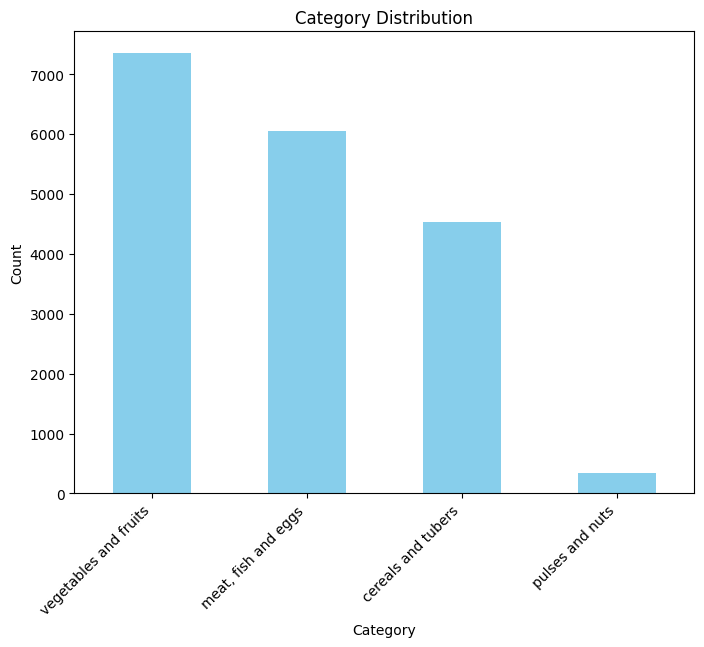

In [29]:
category_counts = clean_pfp['Category'].value_counts()

plt.figure(figsize=(8, 6))
category_counts.plot(kind='bar', color='skyblue')
plt.title('Category Distribution')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

#### Bar Chart # 2:
- Used to visualize category average prices across the years in the dataset using ‘price’ and ‘category’ columns. 

#### Insights:
- Some categories were not recorded in some years. 
- A consistent increase in the average prices is noticable, indicating inflation of goods over the past years. 
- "Meat, Fish, and Eggs" has the highest average price among all categories and showcases price spikes over the years. This may be due to increased demand and an unstable supply.

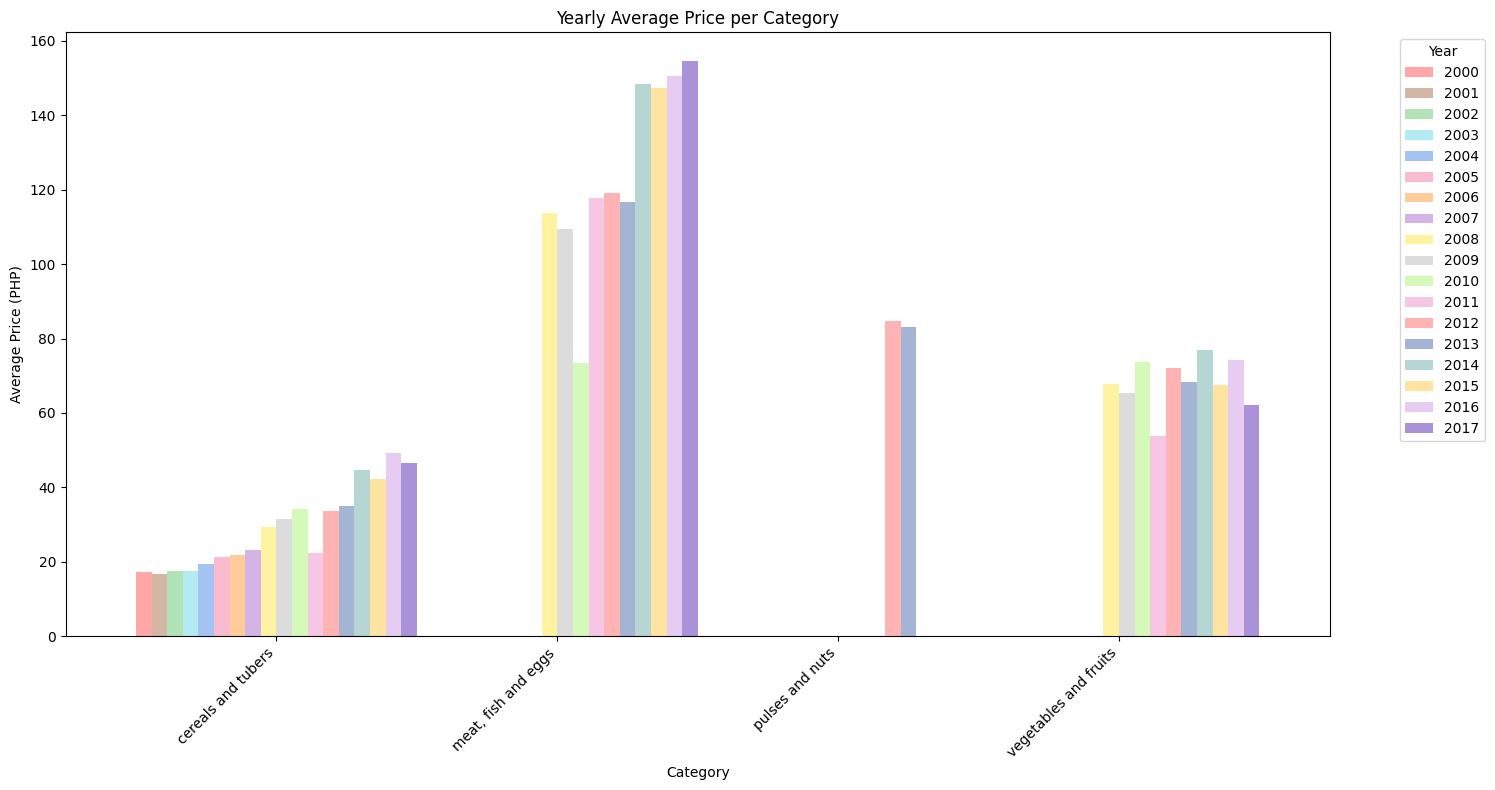

In [30]:
# Convert the 'data' column to datetime format and extract the year
clean_pfp['Year'] = pd.to_datetime(clean_pfp['Date'], format='%d/%m/%Y').dt.year

# Calculate the yearly average price per category
yearly_avg_price = clean_pfp.groupby(['Year', 'Category'])['Price'].mean().reset_index()

# Pivot the DataFrame to have categories as rows and years as columns
pivot_table = yearly_avg_price.pivot(index='Category', columns='Year', values='Price')

colors = [
    '#ffa6a6',  # salmon
    '#d3b6a3',  # brown
    '#b2e3b6',  # green
    '#b2ebf2',  # cyan
    '#a3c4f3',  # blue
    '#f8bbd0',  # pink
    '#ffcc99',  # orange
    '#d4b3e6',  # purple
    '#fff2a1',  # yellow
    '#dcdcdc',  # grey
    '#d5f9b8',  # lime
    '#f7c6e5',  # magenta
    '#ffb3b3',  # red
    '#a3b4d4',  # navy
    '#b5d6d3',  # teal
    '#ffe3a1',  # gold
    '#e6ccf2',  # purple
    '#A992D8'   # dark purple
]

# Plotting
pivot_table.plot(kind='bar', figsize=(15, 8), color=colors,  width=1)
plt.title('Yearly Average Price per Category')
plt.xlabel('Category')
plt.ylabel('Average Price (PHP)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#### Bar Chart # 3:
- Used to show the number of items available per category in each market in the dataset.

#### Insights:
- The dominance of 'Vegetable and Fruits' is noticable which indicates the high availability rate of the items on this category. Davao City has the highest number of 'Vegetable and Fruit' items compared to other markets. 
- 'Pulses and nuts' have the least representation across all markets, with only a small fraction of the total items. This suggests that pulses and nuts might be less available or traded.
- Most markets shows similar trend and structure for this visualization, indicates that a general trend for food categories that influences availability is present. 

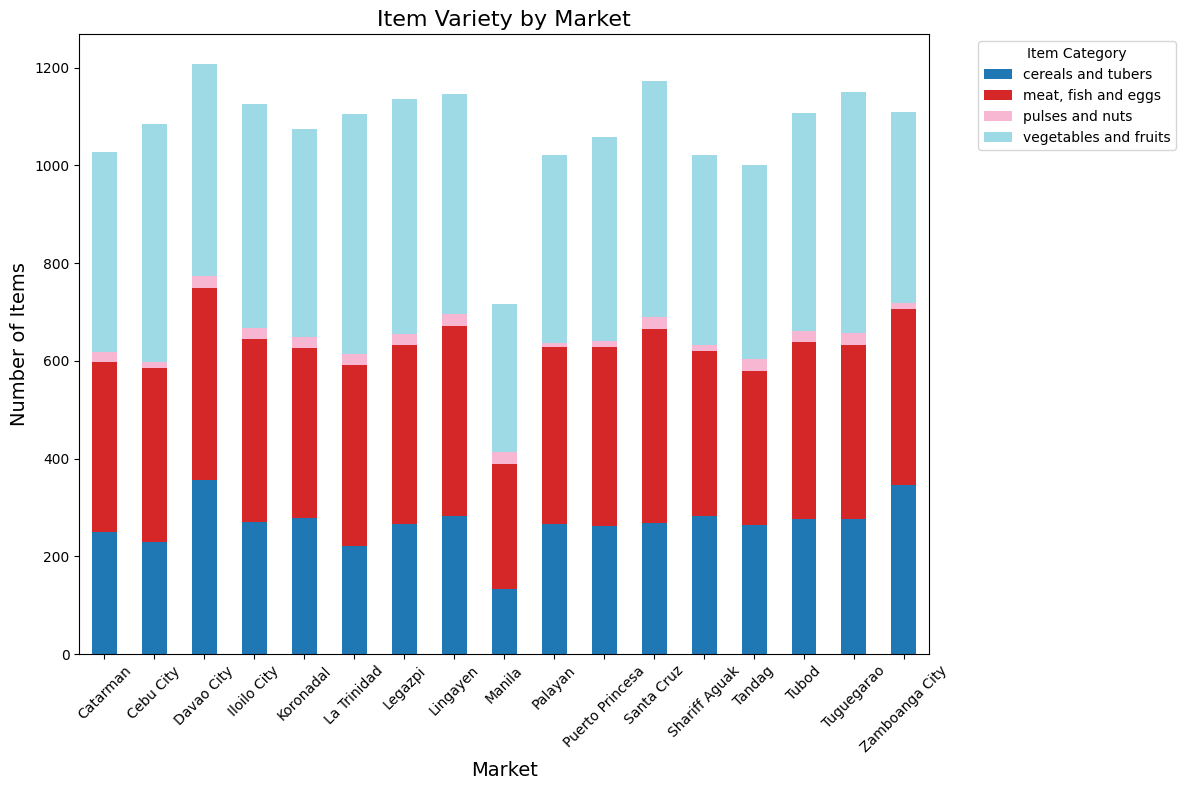

In [31]:
# Count the number of items in each category by market
item_counts = clean_pfp.groupby(['Market Name', 'Category']).size().unstack(fill_value=0)

# Create the stacked bar chart
item_counts.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='tab20')

# Add titles and labels
plt.title('Item Variety by Market', fontsize=16)
plt.xlabel('Market', fontsize=14)
plt.ylabel('Number of Items', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Item Category', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()

#### Box Plot:
- Used to visualize and compare prices in different regions and markets in the dataset. 

#### Insights:
- This visualization highlights the regional disparities in item pricing throughout the Philippines, where some regions experience a broader range of prices.
- Outliers may indicate sudden food price spikes, and this may be due to limited supply. 
- La Trinidad does not contribute much in price variability, this may be due to the fact that this region is the source of most food supplies in the country, like vegetables and fruits. 


In [61]:
clean_pfp['Region'].unique()

array(['Cordillera Administrative region (CAR)',
       'National Capital region (NCR)', 'Region I (Ilocos region)',
       'Region II (Cagayan Valley)', 'Region V (Bicol region)',
       'Region VI (Western Visayas)', 'Region VII (Central Visayas)',
       'Region VIII (Eastern Visayas)', 'Region XIII (Caraga)',
       'Autonomous region in Muslim Mindanao (ARMM)',
       'Region IX (Zamboanga Peninsula)', 'Region X (Northern Mindanao)',
       'Region XI (Davao Region)', 'Region XII (Soccsksargen)',
       'Region III (Central Luzon)', 'Region IV-A (Calabarzon)',
       'Region IV (Southern Tagalog)'], dtype=object)

C:\Users\jerom\AppData\Local\Temp\ipykernel_8428\3029213280.py:26: UserWarning: The palette list has more values (18) than needed (17), which may not be intended.
  sns.boxplot(


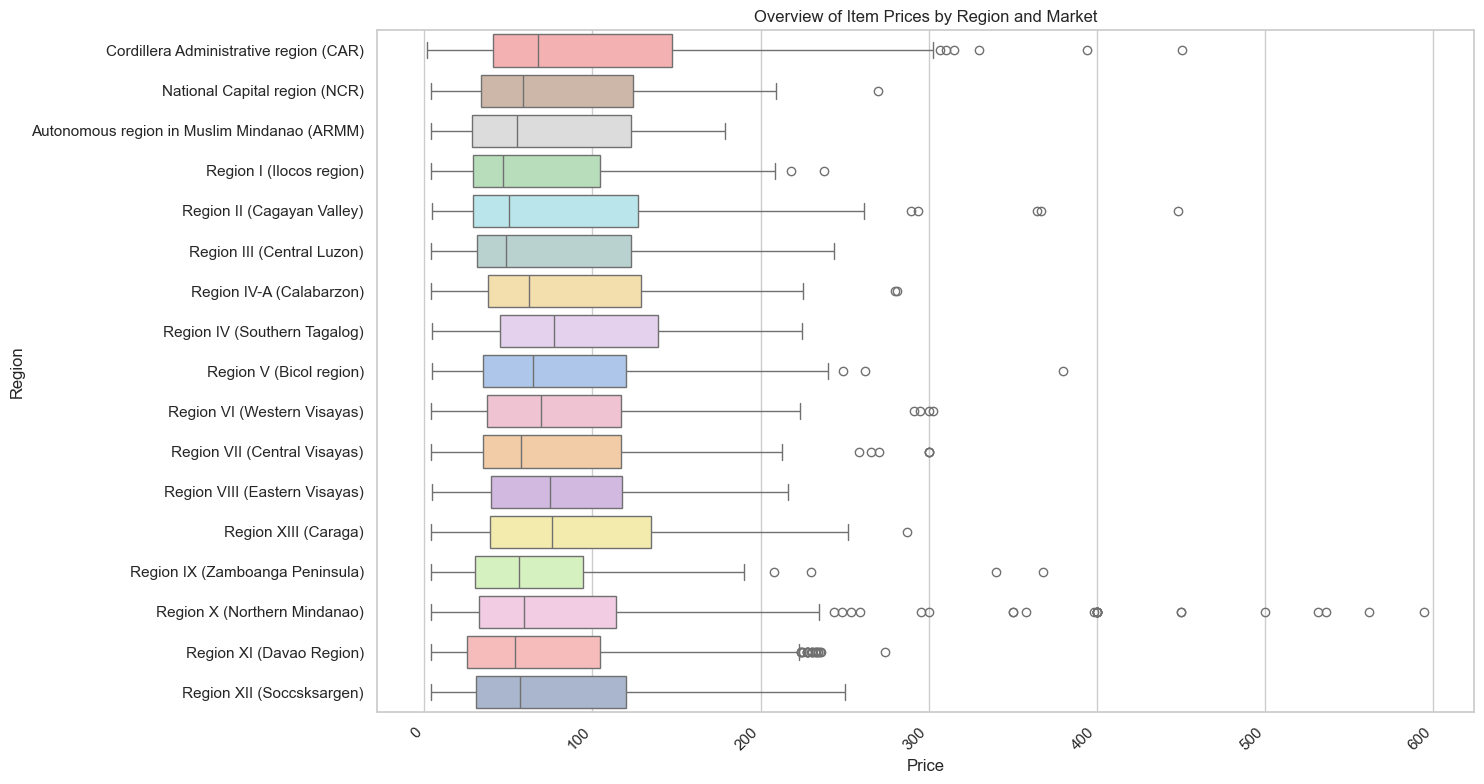

In [65]:
# Define the desired order of regions
region_order = [
    'Cordillera Administrative region (CAR)',
    'National Capital region (NCR)',
    'Autonomous region in Muslim Mindanao (ARMM)',
    'Region I (Ilocos region)',
    'Region II (Cagayan Valley)', 
    'Region III (Central Luzon)',
    'Region IV-A (Calabarzon)',
    'Region IV (Southern Tagalog)',
    'Region V (Bicol region)',
    'Region VI (Western Visayas)', 
    'Region VII (Central Visayas)',
    'Region VIII (Eastern Visayas)', 
    'Region XIII (Caraga)',
    'Region IX (Zamboanga Peninsula)', 
    'Region X (Northern Mindanao)',
    'Region XI (Davao Region)', 
    'Region XII (Soccsksargen)'
    ]

# Set up the plot
plt.figure(figsize=(15, 8))

# Create a boxplot with seaborn
sns.boxplot(
    data=clean_pfp,
    x='Price', 
    y='Region',
    hue='Region', 
    palette=colors,
    order=region_order
)

# Customize the plot
plt.title('Overview of Item Prices by Region and Market')
#plt.xlabel('Region')
plt.xlabel('Price')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Display the plot
plt.show()

#### Histogram:
- Used to the distribution of the prices in the dataset. 

#### Insights:
- Most products in the dataset are less than 100 pesos which is the reason the distribution is Right Skewed. 
- The prices only range from 0 to 300 pesos which indicates that the goods available in the dataset only focusses on basic necessities.

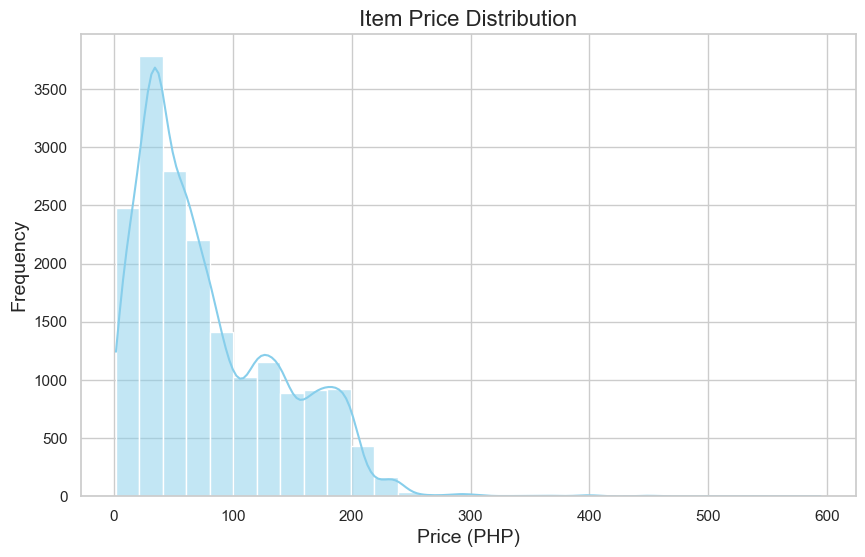

In [33]:
# Set the style of the visualization
sns.set(style="whitegrid")

# Create a histogram of price values
plt.figure(figsize=(10, 6))
sns.histplot(clean_pfp['Price'], bins=30, color='skyblue', kde=True)

# Add titles and labels
plt.title('Item Price Distribution', fontsize=16)
plt.xlabel('Price (PHP)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Show the plot
plt.show()


#### Line Graph
- Used to show the average price trends of all items from 2000 to 2017. 
- Used to visualize price spikes over the years

#### Insights
- The prices was stable during year 2000 to 2007 but sudden increase occur in the later years. This may be due to price inflation of goods. 
- The price shows an upward trend, which indicates contionous increase over the years. 

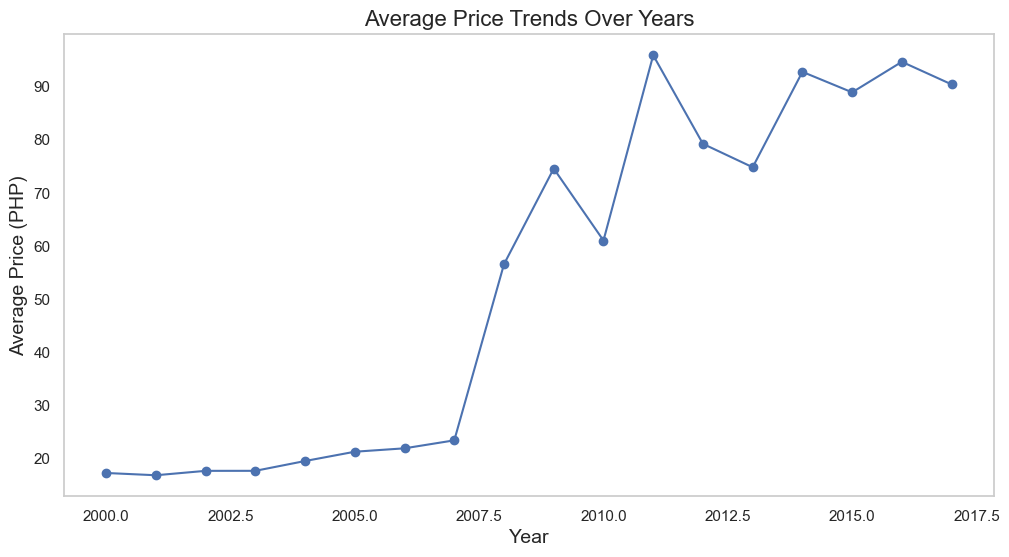

In [34]:
# Calculate average price per year
yearly_average_price = clean_pfp.groupby('Year')['Price'].mean()

# Create the line plot
plt.figure(figsize=(12, 6))
yearly_average_price.plot(kind='line', marker='o')
plt.title('Average Price Trends Over Years', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Price (PHP)', fontsize=14)
plt.grid()
plt.show()


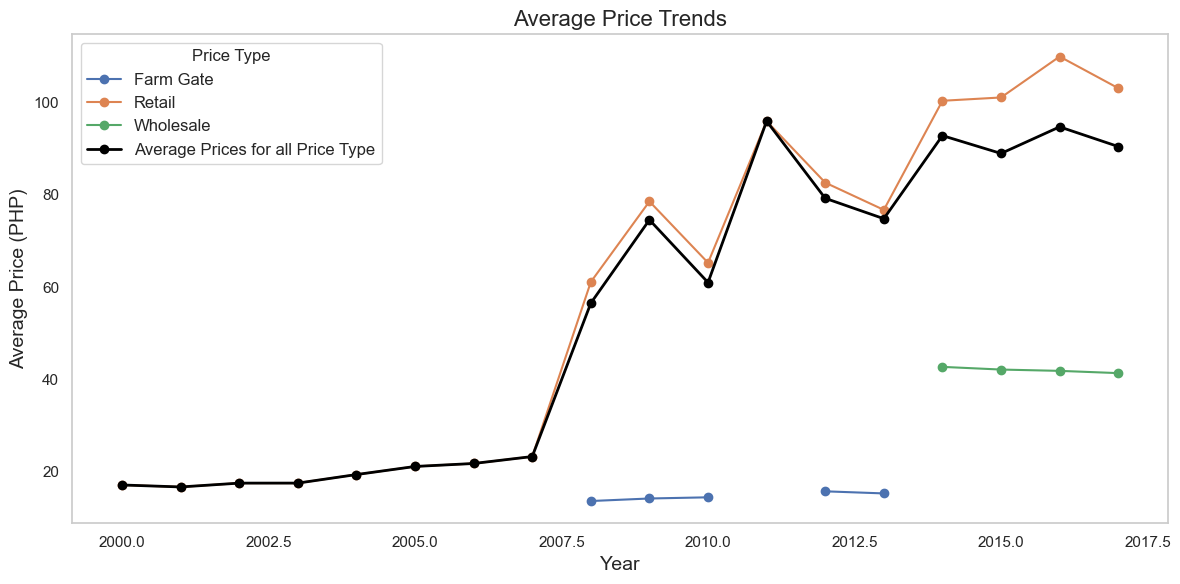

In [35]:
# Calculate average price per year and price type
yearly_average_price_type = clean_pfp.groupby(['Year', 'Price Type'])['Price'].mean().unstack()

# Calculate global average price per year
yearly_average_price = clean_pfp.groupby('Year')['Price'].mean()

# Create the line plot
plt.figure(figsize=(12, 6))

# Plot average price by price type
yearly_average_price_type.plot(kind='line', marker='o', ax=plt.gca())

# Plot global average price
yearly_average_price.plot(kind='line', marker='o', color='black', linewidth=2, label='Average Prices for all Price Type')

# Customize the plot
plt.title('Average Price Trends', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Price (PHP)', fontsize=14)
plt.grid()
plt.legend(title='Price Type', fontsize=12)
plt.tight_layout()  
plt.show()
